In [6]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim.models import LdaModel,TfidfModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
import os
import pandas as pd
from datasets import load_dataset
import numpy as np
from sklearn.model_selection import train_test_split 
from nltk import word_tokenize


In [7]:
my_student_number = 2619208
num_classes = 3

# Question 2.1

C:\Users\agarw\AppData\Local\Temp\ipykernel_12336\46549664.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="Blues")


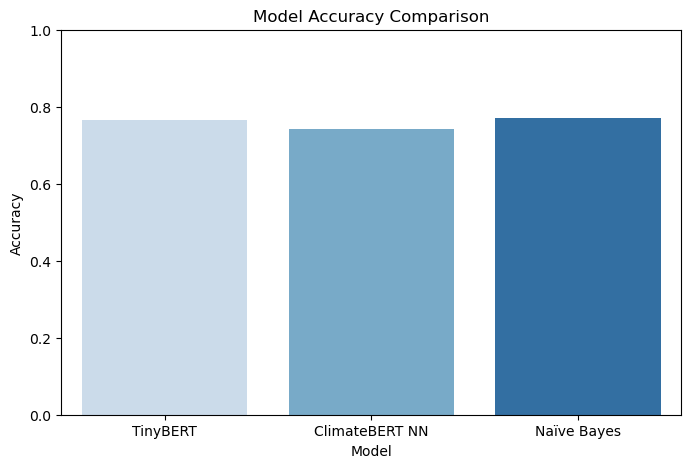

Accuracy (TinyBERT): 0.7662
Accuracy (ClimateBERT NN): 0.7413
Accuracy (Naïve Bayes): 0.7711


In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt

nb_preds = pd.read_csv("./outputs/11d_improved_preds.csv",header=None).iloc[:,1]

nn_preds =pd.read_csv("./outputs/12_nn_preds.csv",header=None).iloc[:,1]

bert_preds= pd.read_csv("./outputs/13c_bert_preds.csv",header=None).iloc[:,1]

val_labels = pd.read_csv("./outputs/val_labels.csv",header=None).iloc[:,1]

accuracy_improved = accuracy_score(val_labels,nb_preds)
accuracy_nn = accuracy_score(val_labels,nn_preds)
accuracy_tinybert = accuracy_score(val_labels,bert_preds)

# Store results in a dataframe
results = pd.DataFrame({
    "Model": ["TinyBERT", "ClimateBERT NN", "Naïve Bayes"],
    "Accuracy": [accuracy_tinybert, accuracy_nn, accuracy_improved]
})

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="Blues")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Print the accuracy values
print(f"Accuracy (TinyBERT): {accuracy_tinybert:.4f}")
print(f"Accuracy (ClimateBERT NN): {accuracy_nn:.4f}")
print(f"Accuracy (Naïve Bayes): {accuracy_improved:.4f}")



C:\Users\agarw\AppData\Local\Temp\ipykernel_12336\242332877.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=misclassified_counts, palette="Blues_d")


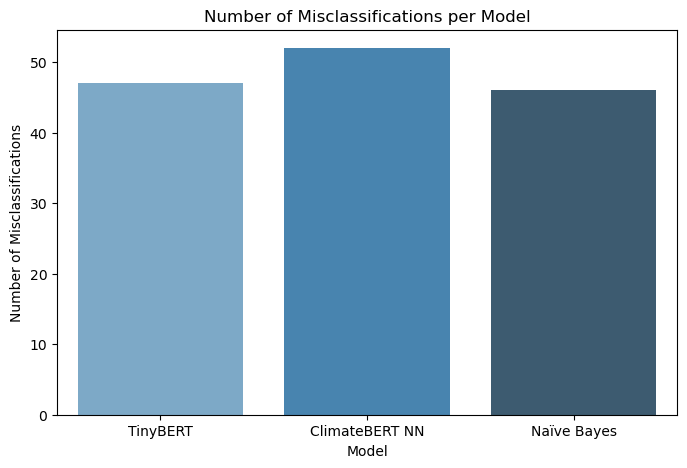


Misclassified Examples for TinyBERT:
                                                Text  True Label  \
0  In the fiscal year ended March 31, 2020, GHG e...           1   
1  The Technology and Operations and Enterprise S...           0   
2  The following additional restrictions are in p...           0   
3  Investec group including Investec Asset Manage...           0   
4  The next phase of the CSIRO research will focu...           1   

   Predicted Label  
0                2  
1                1  
2                1  
3                1  
4                0  

Misclassified Examples for ClimateBERT NN:
                                                Text  True Label  \
0  As a result, we have not faced any new claims ...           0   
1  Across all our businesses our plans include ta...           2   
2  27TAIHEIYO CEMENT REPORT 2020 ince introducing...           2   
3  As demonstrated by the results of the first as...           0   
4  The Technology and Operations and Enterp

In [12]:
val_texts = pd.read_csv("./outputs/val_texts.csv",header=None).iloc[:,1]
# Function to analyze misclassified examples
def analyze_misclassifications(true_labels, predicted_labels, texts, model_name):
    misclassified_idx = [i for i in range(len(true_labels)) if true_labels[i] != predicted_labels[i]]
    print(f"\nMisclassified Examples for {model_name}:")
    for i in misclassified_idx[:5]:  # Show first 5 misclassified examples
        print(f"Text: {texts[i]}")
        print(f"True Label: {true_labels[i]}, Predicted: {predicted_labels[i]}\n")

# Analyzing misclassifications
analyze_misclassifications(val_labels, bert_preds, val_texts, "TinyBERT")
analyze_misclassifications(val_labels, nn_preds, val_texts, "ClimateBERT NN")
analyze_misclassifications(val_labels, nb_preds, val_texts, "Naïve Bayes")


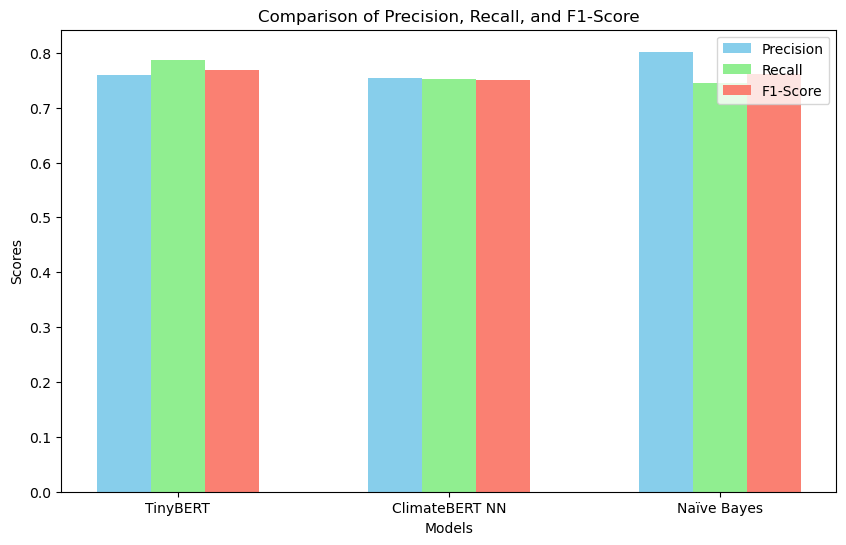


Classification Report for TinyBERT:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        76
           1       0.76      0.66      0.71        82
           2       0.70      0.88      0.78        43

    accuracy                           0.77       201
   macro avg       0.76      0.79      0.77       201
weighted avg       0.77      0.77      0.76       201


Classification Report for ClimateBERT NN:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        76
           1       0.67      0.76      0.71        82
           2       0.78      0.81      0.80        43

    accuracy                           0.74       201
   macro avg       0.75      0.75      0.75       201
weighted avg       0.75      0.74      0.74       201


Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        76
         

In [10]:
def plot_comparison_report(true_labels, predictions_list, model_names):
    # Initialize dictionaries to store Precision, Recall, F1-Score for each model
    precision = []
    recall = []
    f1 = []

    # Compute classification reports for each model and extract key metrics
    for predictions in predictions_list:
        report = classification_report(true_labels, predictions, output_dict=True)
        # Extract precision, recall, f1-score for each class (macro average)
        precision.append(report['macro avg']['precision'])
        recall.append(report['macro avg']['recall'])
        f1.append(report['macro avg']['f1-score'])

    # Plot the comparison of Precision, Recall, and F1 Score
    x = np.arange(len(model_names))  # x-axis positions
    width = 0.2  # Bar width

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - width, precision, width, label='Precision', color='skyblue')
    ax.bar(x, recall, width, label='Recall', color='lightgreen')
    ax.bar(x + width, f1, width, label='F1-Score', color='salmon')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Precision, Recall, and F1-Score')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    plt.show()

# Example: Comparison plot for the three models
model_names = ["TinyBERT", "ClimateBERT NN", "Naïve Bayes"]
predictions_list = [bert_preds, nn_preds, nb_preds]  # Add the actual predicted labels from each model
plot_comparison_report(val_labels, predictions_list, model_names)

# Generate classification reports
print("\nClassification Report for TinyBERT:")
print(classification_report(val_labels, bert_preds))

print("\nClassification Report for ClimateBERT NN:")
print(classification_report(val_labels, nn_preds))

print("\nClassification Report for Naïve Bayes:")
print(classification_report(val_labels, nb_preds))

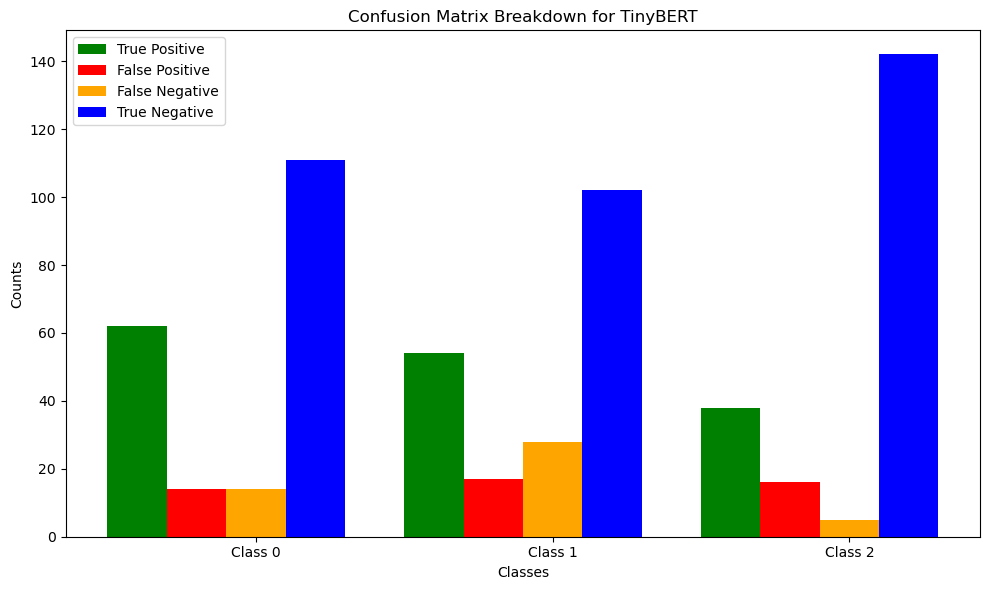


Confusion Matrix for TinyBERT:
[[62 12  2]
 [14 54 14]
 [ 0  5 38]]


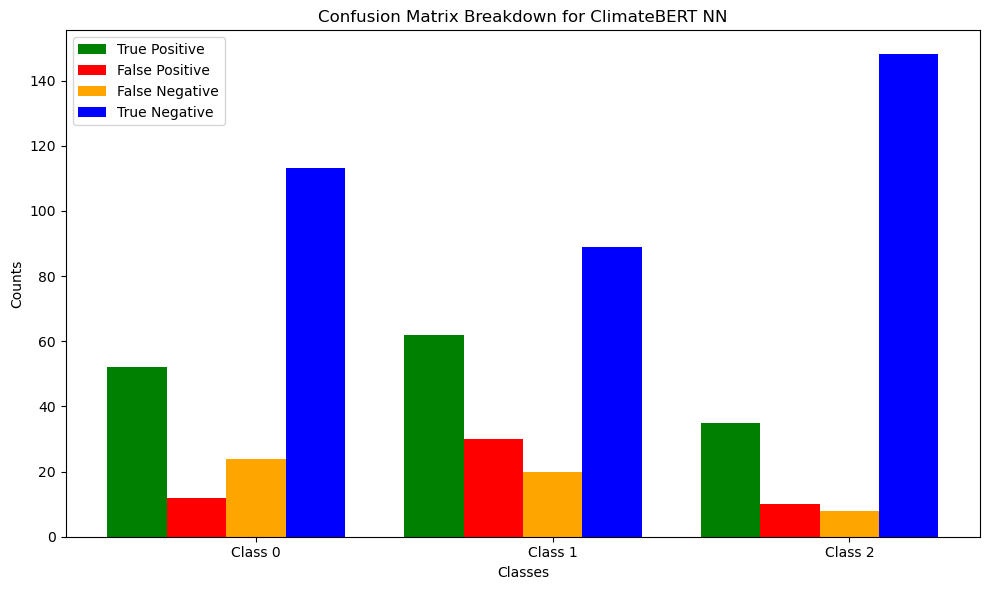


Confusion Matrix for ClimateBERT NN:
[[52 22  2]
 [12 62  8]
 [ 0  8 35]]


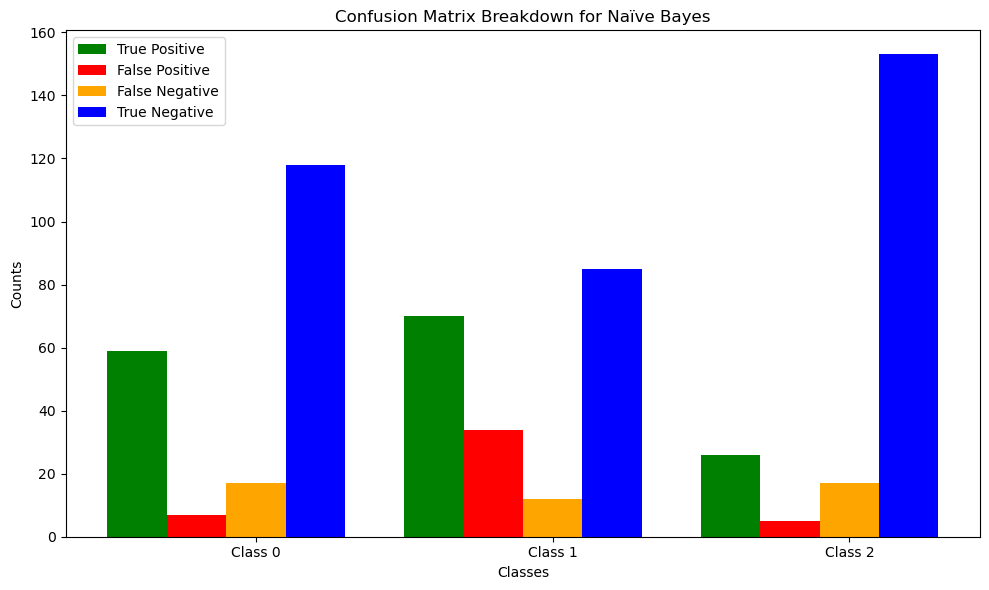


Confusion Matrix for Naïve Bayes:
[[59 17  0]
 [ 7 70  5]
 [ 0 17 26]]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_bars(true_labels, predicted_labels, model_name, classes):
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Create an array for each type of value (True Positive, False Positive, etc.)
    true_positive = np.diagonal(cm)
    false_positive = np.sum(cm, axis=0) - true_positive
    false_negative = np.sum(cm, axis=1) - true_positive
    true_negative = np.sum(cm) - (true_positive + false_positive + false_negative)
    
    # Set positions for the bars
    bar_width = 0.2
    index = np.arange(len(classes))
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(index - bar_width, true_positive, bar_width, label='True Positive', color='green')
    ax.bar(index, false_positive, bar_width, label='False Positive', color='red')
    ax.bar(index + bar_width, false_negative, bar_width, label='False Negative', color='orange')
    ax.bar(index + 2*bar_width, true_negative, bar_width, label='True Negative', color='blue')
    
    # Add labels and title
    ax.set_xlabel('Classes')
    ax.set_ylabel('Counts')
    ax.set_title(f'Confusion Matrix Breakdown for {model_name}')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(classes)
    ax.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Print the confusion matrix values
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)

# Class names
classes = ["Class 0", "Class 1", "Class 2"]

# Plot for each model
plot_confusion_matrix_bars(val_labels, bert_preds, "TinyBERT", classes)
plot_confusion_matrix_bars(val_labels, nn_preds, "ClimateBERT NN", classes)
plot_confusion_matrix_bars(val_labels, nb_preds, "Naïve Bayes", classes)


# Question 2.2 - Topic Modelling

In [64]:
# load the original training set from HuggingFace
train_dataset = load_dataset(
    "climatebert/climate_sentiment",
    split="train",
    cache_dir=cache_dir,
)

train_texts = train_dataset['text']

In [65]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(lemmatizer.lemmatize(token,'v'))
    # text = text.lower()  # Convert to lowercase
    # tokens = word_tokenize(text)  # Tokenize the text
    # return [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatize and remove stop words
    print(result)
    return result

In [66]:
# Preprocess the training texts
processed_texts = []
for doc in train_texts:
    processed_texts.append(preprocess(doc))

['scope', 'optional', 'scope', 'include', 'indirect', 'emissions', 'associate', 'goods', 'service', 'supply', 'chain', 'produce', 'outside', 'organization', 'include', 'emissions', 'transport', 'products', 'logistics', 'centre', 'store', 'downstream', 'perform', 'external', 'logistics', 'operators', 'air', 'land', 'sea', 'transport', 'emissions', 'associate', 'electricity', 'consumption', 'franchise', 'store']
['group', 'aware', 'noise', 'pollution', 'negatively', 'impact', 'environment', 'aware', 'impact', 'biodiversity', 'regard', 'land', 'use', 'group', 'commercial', 'user', 'group', 'aware', 'local', 'constraints', 'regard', 'water', 'supply', 'group', 'believe', 'risk', 'regard', 'climate', 'change', 'near', 'mid', 'term']
['global', 'climate', 'change', 'exacerbate', 'certain', 'threats', 'face', 'business', 'include', 'frequency', 'severity', 'weather', 'relate', 'events', 'refer', 'performance', 'critical', 'infrastructure', 'section', 'addition', 'increase', 'energy', 'price',

In [67]:
# Create a Gensim Dictionary from the processed texts
dictionary = corpora.Dictionary(processed_texts)
print(dictionary)

# Create a BoW corpus
bow_corpus = [dictionary.doc2bow(text) for text in processed_texts]


Dictionary<4749 unique tokens: ['air', 'associate', 'centre', 'chain', 'consumption']...>


In [68]:
def LDA_model(corpus,n_topic):
    lda = LdaModel(corpus=corpus,num_topics=n_topic,id2word=dictionary,passes=20,random_state=my_student_number)

    topics_lda = lda.print_topics(num_words=10)

    return lda,topics_lda

In [69]:
# ---------- LDA Model 1: 3 Topics ----------
lda,topics_lda = LDA_model(bow_corpus,3)


In [70]:
# ---------- LDA Model 2: 3 Topics ----------

# TFIDF MODEL variation
tfidf_model = TfidfModel(bow_corpus)

# Transform the BoW corpus to a TF-IDF corpus
tfidf_corpus = tfidf_model[bow_corpus]

tfidf_lda_model,topics_tfidf = LDA_model(tfidf_corpus.corpus,3)


In [71]:
# ---------- Top2Vec Model 2: Risk Opportunity Topics ----------

from top2vec import Top2Vec

# Convert each list of tokens into a single string
processed_texts_strings = [" ".join(tokens) for tokens in processed_texts]

top2vec_model = Top2Vec(
    documents=processed_texts_strings,
    speed="deep-learn",  # or "deep-learn"
    workers=4,
    min_count=2
)


# Get number of topics found
num_topics = len(top2vec_model.get_topics()[0])
print(f"Number of topics found: {num_topics}")

# Show top words for each topic
topic_words, word_scores, topic_nums = top2vec_model.get_topics()
for i, (words, scores) in enumerate(zip(topic_words, word_scores)):
    print(f"\nTopic {i}:")
    print(", ".join(words[:10]))

# Find topics most related to "risk" or "opportunity"
for keyword in ["risk", "opportunity"]:
    topic_words, word_scores, topic_scores, topic_nums = top2vec_model.search_topics(keywords=[keyword], num_topics=3)
    print(f"\nTop topics related to '{keyword}':")
    for i, (words, score, num) in enumerate(zip(topic_words, topic_scores, topic_nums)):
        print(f"Topic {num} (Score: {score:.2f}): {', '.join(words[:10])}")



2025-04-27 10:27:21,555 - top2vec - INFO - Pre-processing documents for training
C:\Users\agarw\anaconda3\envs\text_analytics\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-04-27 10:27:22,554 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2025-04-27 10:27:25,030 - top2vec - INFO - Creating joint document/word embedding
2025-04-27 10:29:24,782 - top2vec - INFO - Creating lower dimension embedding of documents
C:\Users\agarw\anaconda3\envs\text_analytics\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-04-27 10:29:43,591 - top2vec - INFO - Finding dense areas of documents
C:\Users\agarw\anaconda3\envs\text_analytics\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

Number of topics found: 4

Topic 0:
stakeholders, stakeholder, renewables, sustainability, eco, renewable, organisations, emissions, investments, initiatives

Topic 1:
climate, risk, disasters, environment, climatic, catastrophes, mitigation, emissions, environmental, liabilities

Topic 2:
risk, stakeholders, liabilities, organisations, stakeholder, assurance, liability, organisation, compliance, environment

Topic 3:
emissions, emission, scopes, scope, pollution, stakeholders, organisations, regulatory, environmental, efficiencies

Top topics related to 'risk':
Topic 2 (Score: 0.51): risk, stakeholders, liabilities, organisations, stakeholder, assurance, liability, organisation, compliance, environment
Topic 1 (Score: 0.47): climate, risk, disasters, environment, climatic, catastrophes, mitigation, emissions, environmental, liabilities
Topic 0 (Score: 0.28): stakeholders, stakeholder, renewables, sustainability, eco, renewable, organisations, emissions, investments, initiatives

Top t

In [72]:
# Topic sizes
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
for size, num in zip(topic_sizes, topic_nums):
    print(f"Topic {num} has {size} documents.")

# Top words and scores
topic_words, word_scores, topic_nums = top2vec_model.get_topics()
for i, (words, scores) in enumerate(zip(topic_words, word_scores)):
    print(f"\nTopic {i} top words:")
    for word, score in zip(words[:10], scores[:10]):
        print(f"{word}: {score:.3f}")

Topic 0 has 597 documents.
Topic 1 has 190 documents.
Topic 2 has 148 documents.
Topic 3 has 65 documents.

Topic 0 top words:
stakeholders: 0.527
stakeholder: 0.504
renewables: 0.499
sustainability: 0.497
eco: 0.465
renewable: 0.459
organisations: 0.458
emissions: 0.453
investments: 0.449
initiatives: 0.435

Topic 1 top words:
climate: 0.520
risk: 0.470
disasters: 0.431
environment: 0.422
climatic: 0.421
catastrophes: 0.397
mitigation: 0.396
emissions: 0.382
environmental: 0.382
liabilities: 0.372

Topic 2 top words:
risk: 0.511
stakeholders: 0.433
liabilities: 0.428
organisations: 0.414
stakeholder: 0.412
assurance: 0.393
liability: 0.386
organisation: 0.375
compliance: 0.371
environment: 0.368

Topic 3 top words:
emissions: 0.677
emission: 0.514
scopes: 0.495
scope: 0.470
pollution: 0.401
stakeholders: 0.397
organisations: 0.384
regulatory: 0.371
environmental: 0.371
efficiencies: 0.361


In [78]:

docs, doc_scores, doc_ids = top2vec_model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score in zip(docs, doc_scores):
    print(f"Score: {score:.3f}\n{doc}\n")

Score: 0.857
support low carbon transition business units pace meet commitment mobilize billion support low carbon solutions build expertise support gsf institute sustainable invest serve clients grow environmental social governance issue climate change specifically survey data institute suggest rapidly accelerate climate focus solutions asset managers asset owners individual investors response develop accessible new products morgan stanley impact quotient page early work scale green bond finance catalyze new opportunities continue drive sector innovation green sustainable bond

Score: 0.852
addition efforts develop sustainable products service bank identify opportunities greener operations action take improve energy efficiency buildings enable currently exceed regulatory requirements meet expectations stakeholders past years bank voluntarily adopt measure considerably improve energy efficiency buildings member energy savers circle hydro quebec public utility manage transmission distri

In [79]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in topics_lda:
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


Topic: 0 
Words: 0.016*"energy" + 0.013*"risk" + 0.013*"carbon" + 0.009*"climate" + 0.008*"increase" + 0.007*"change" + 0.007*"emissions" + 0.007*"project" + 0.006*"reduce" + 0.006*"million"


Topic: 1 
Words: 0.022*"emissions" + 0.014*"gas" + 0.008*"energy" + 0.008*"coal" + 0.007*"oil" + 0.007*"scope" + 0.007*"production" + 0.007*"use" + 0.007*"operations" + 0.006*"increase"


Topic: 2 
Words: 0.028*"climate" + 0.026*"risk" + 0.017*"change" + 0.010*"environmental" + 0.009*"impact" + 0.008*"include" + 0.008*"relate" + 0.007*"management" + 0.007*"financial" + 0.007*"group"




In [80]:
# Print the topics discovered by LDA
for idx, topic in topics_tfidf:
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.016*"energy" + 0.013*"risk" + 0.013*"carbon" + 0.009*"climate" + 0.008*"increase" + 0.007*"change" + 0.007*"emissions" + 0.007*"project" + 0.006*"reduce" + 0.006*"million"


Topic: 1 
Words: 0.022*"emissions" + 0.014*"gas" + 0.008*"energy" + 0.008*"coal" + 0.007*"oil" + 0.007*"scope" + 0.007*"production" + 0.007*"use" + 0.007*"operations" + 0.006*"increase"


Topic: 2 
Words: 0.028*"climate" + 0.026*"risk" + 0.017*"change" + 0.010*"environmental" + 0.009*"impact" + 0.008*"include" + 0.008*"relate" + 0.007*"management" + 0.007*"financial" + 0.007*"group"




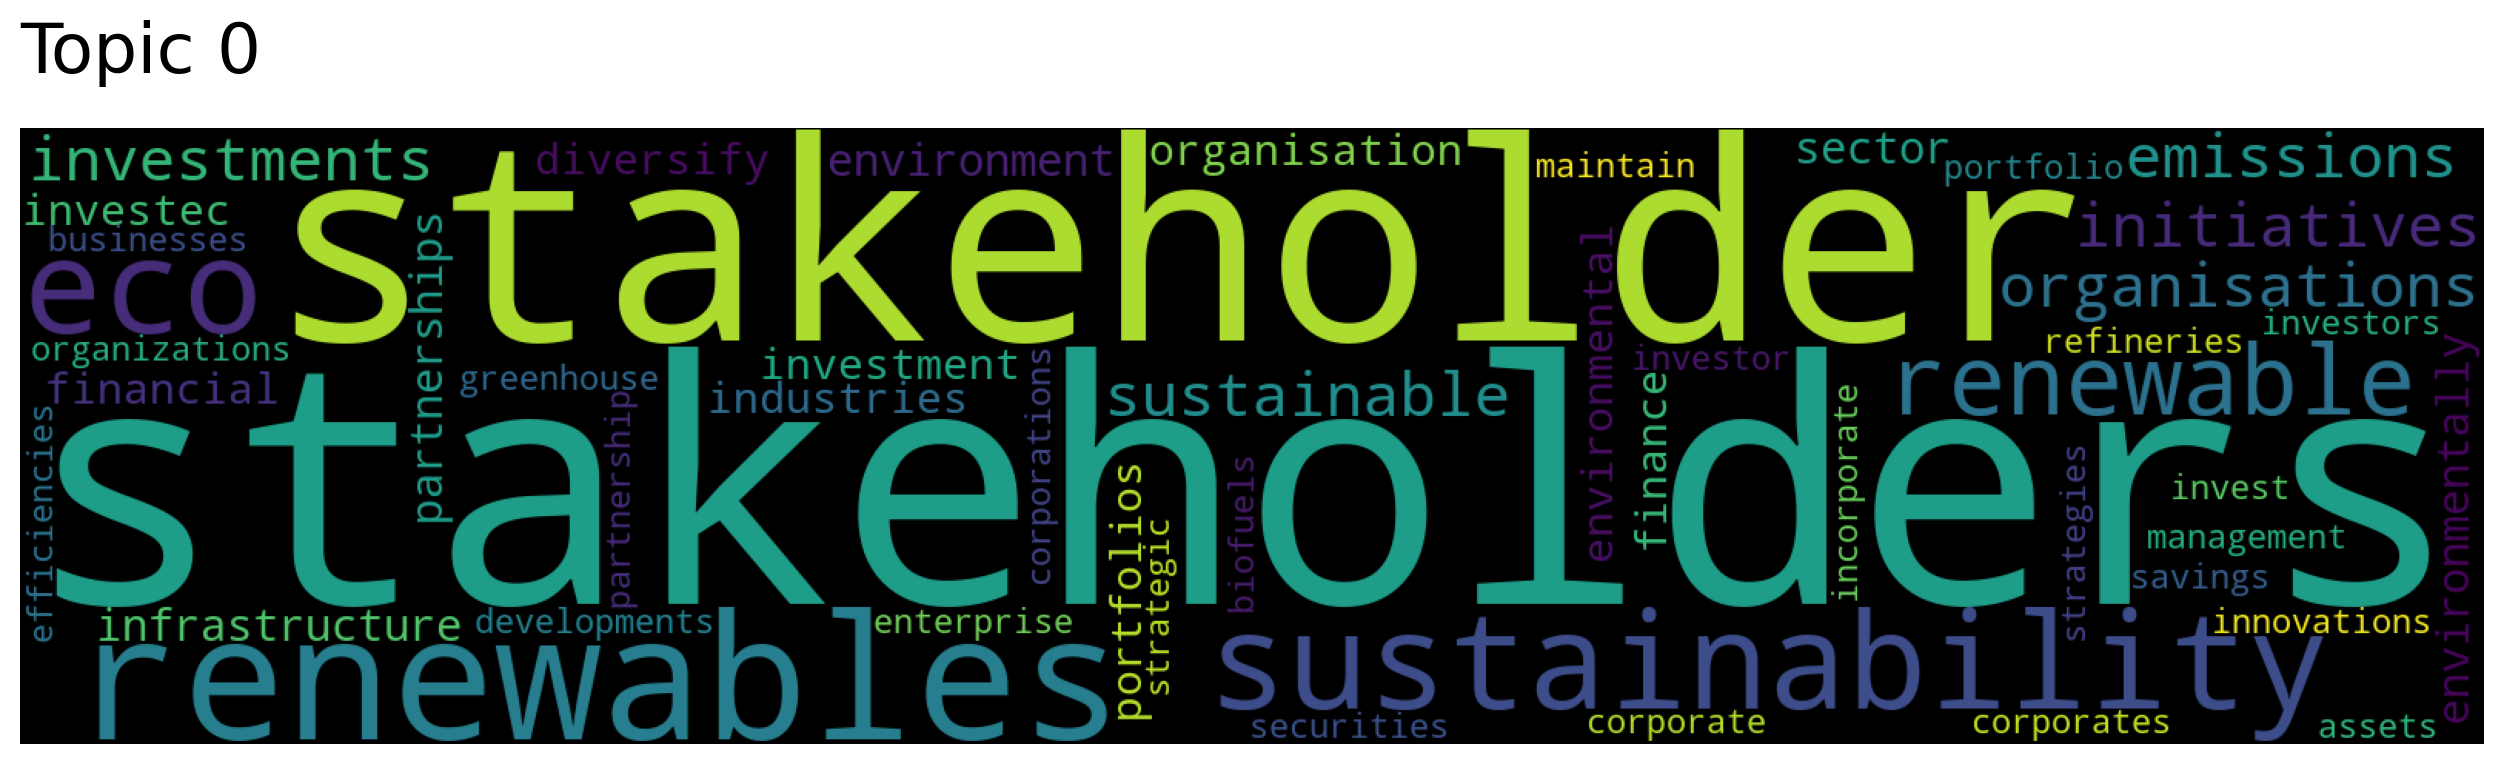

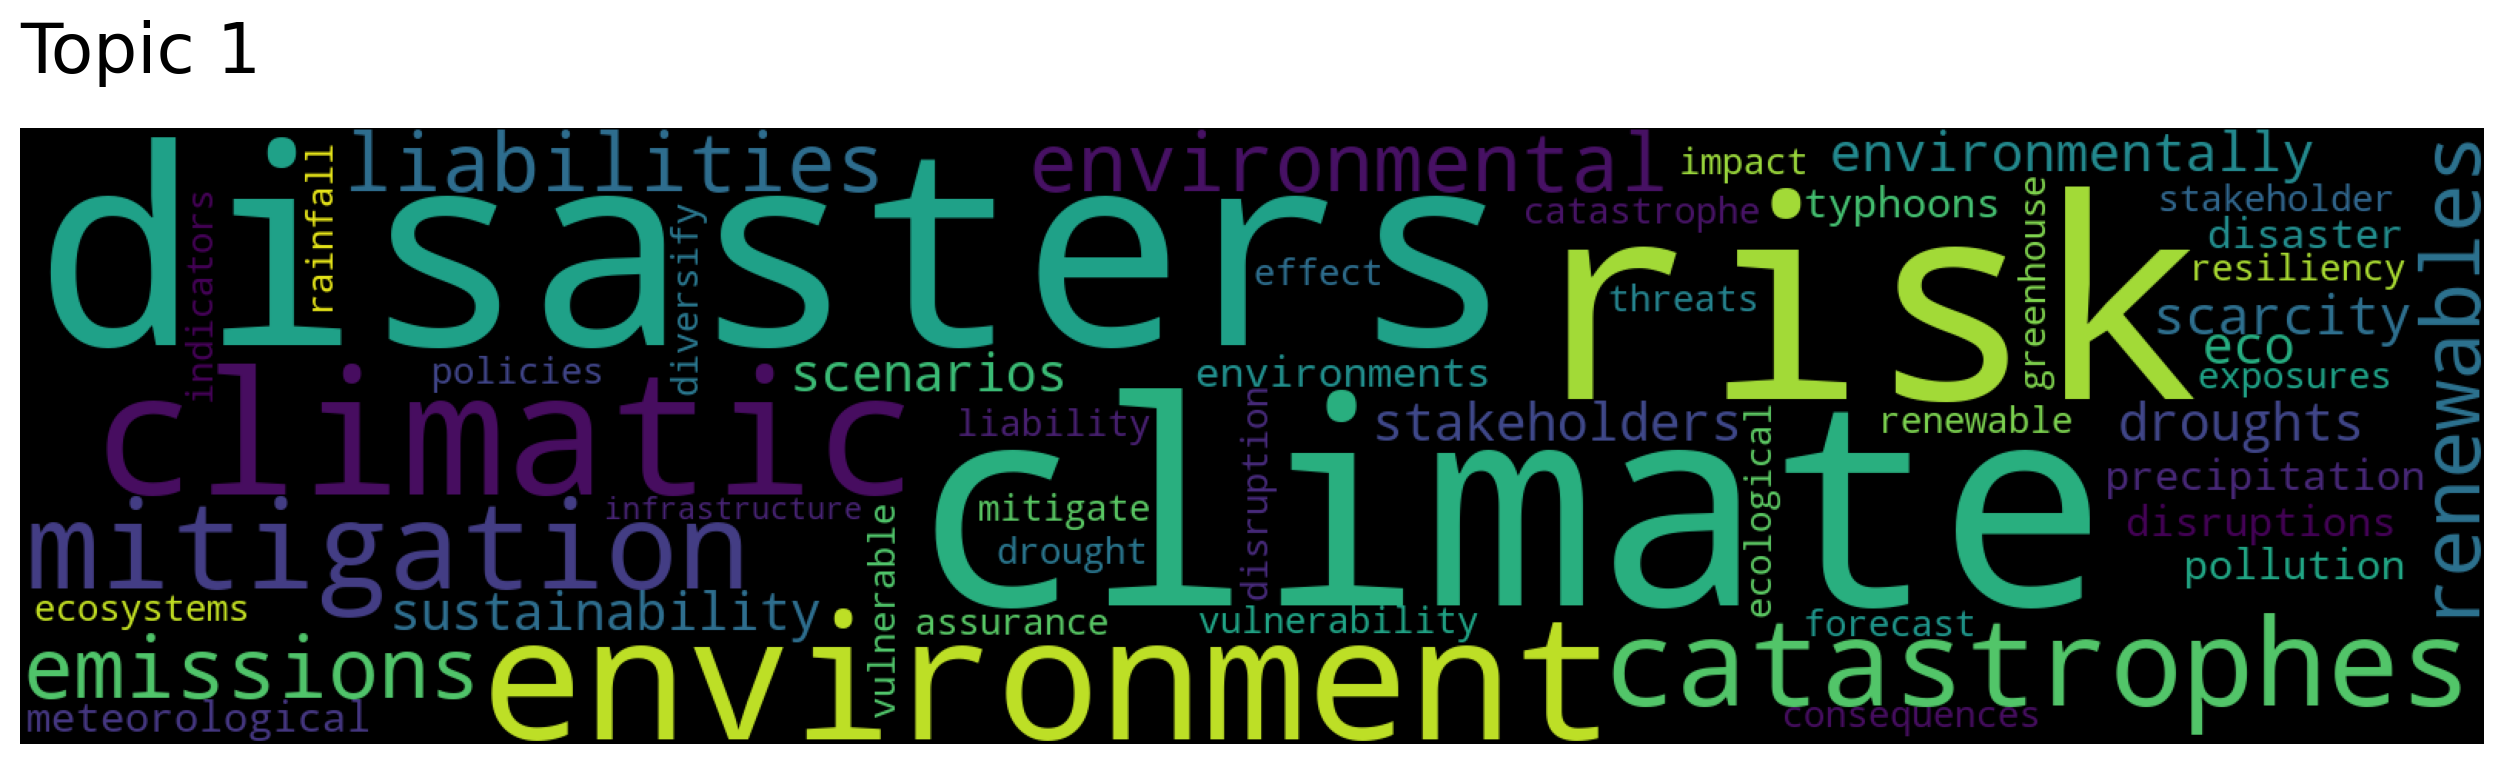

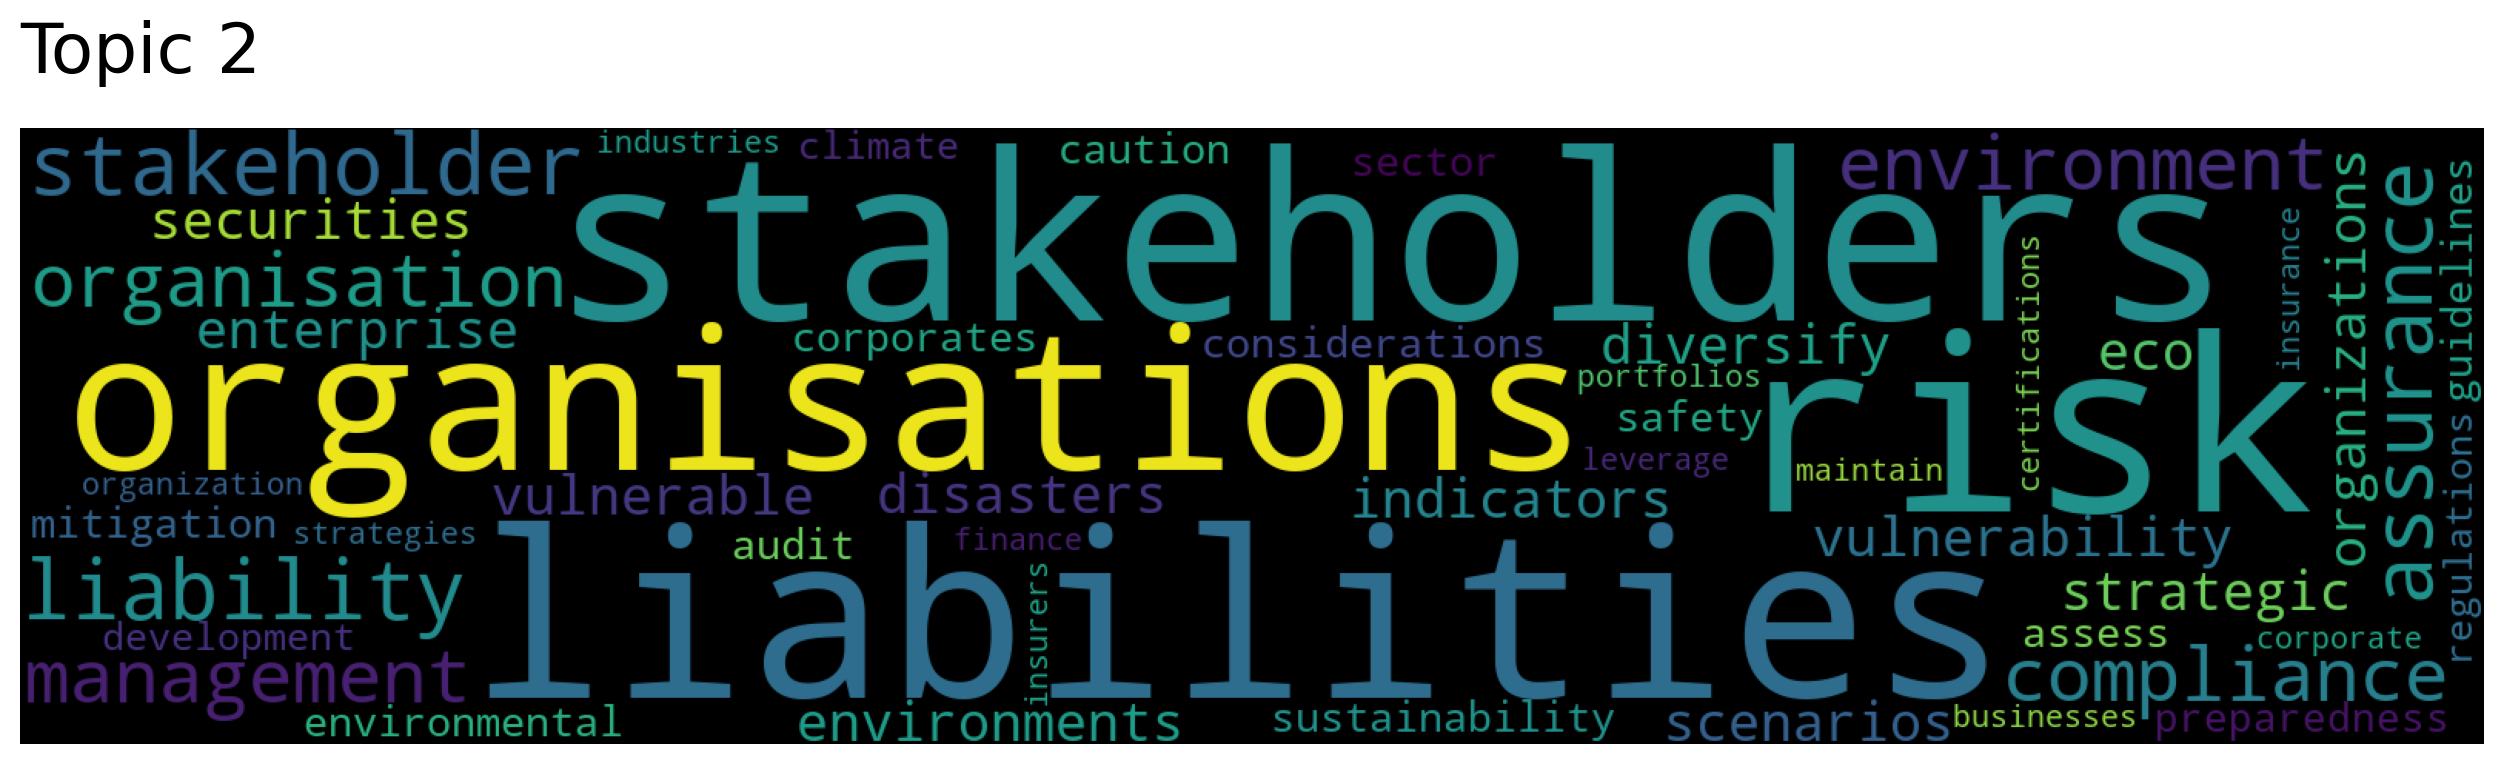

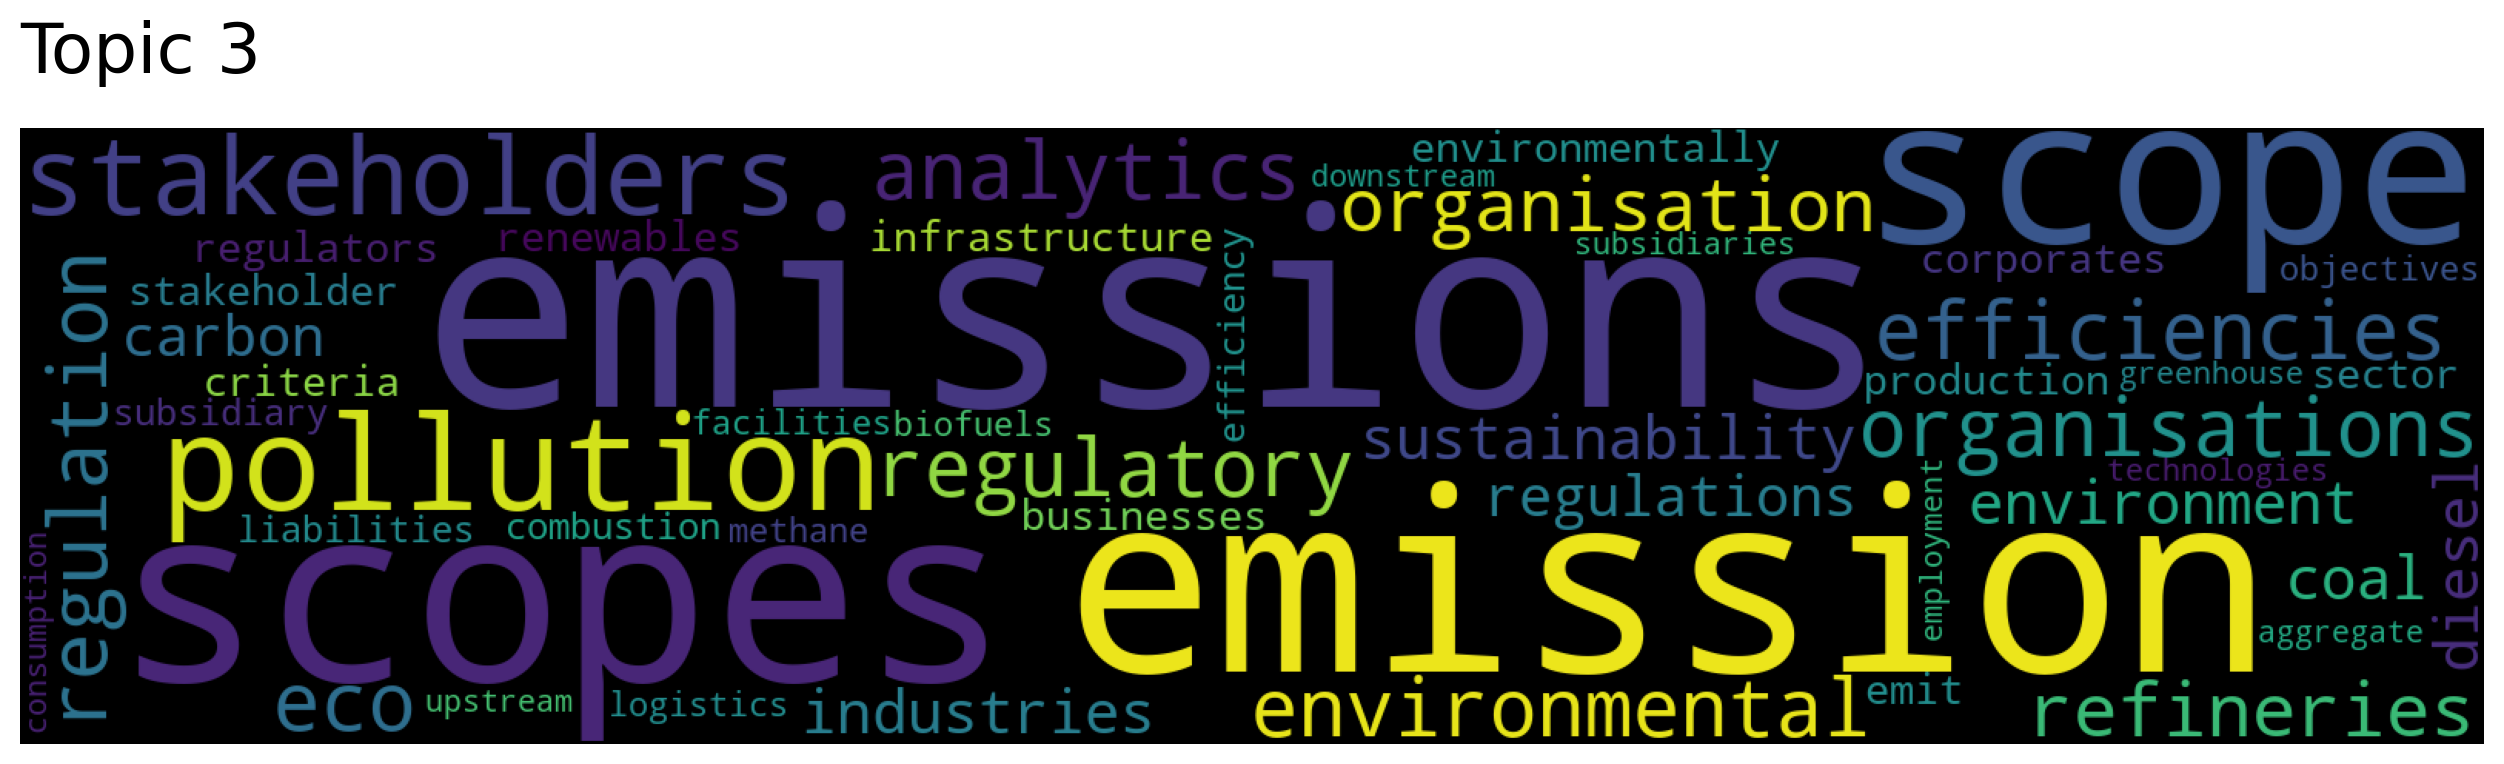

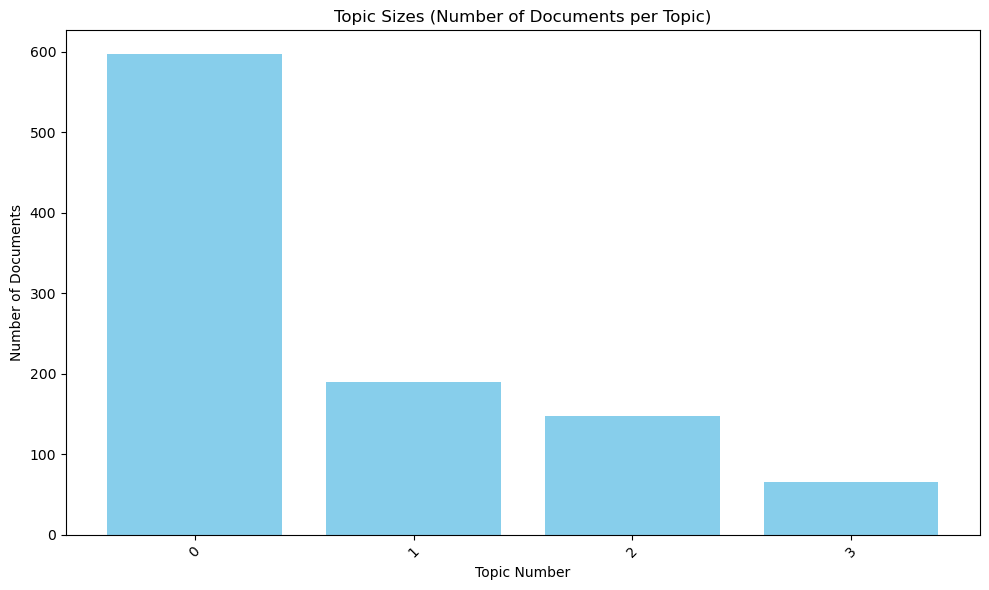

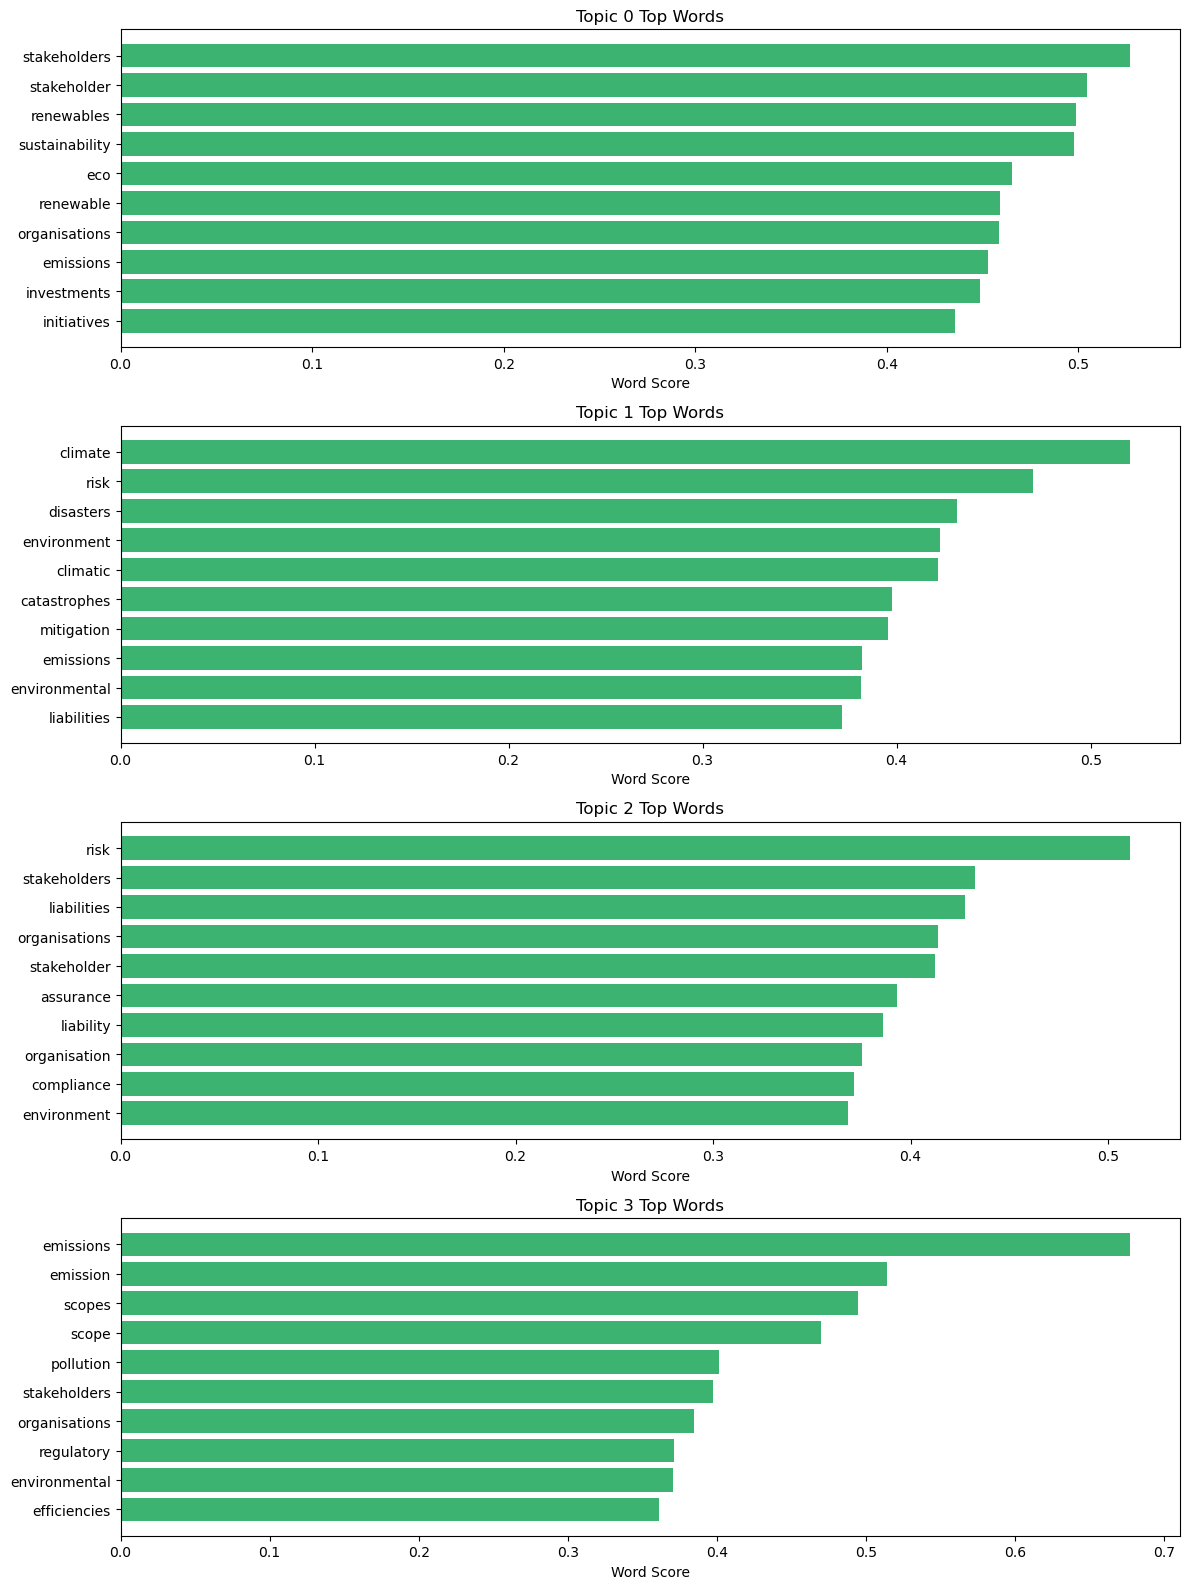

In [81]:
import matplotlib.pyplot as plt
# top2vec_model.generate_topic_wordcloud(topic_num=0)  # Change topic_num as needed

#===========================================TOP2VEC==========================================================

# 1. Plot Topic Sizes
# This bar chart shows the number of documents associated with each topic.
# Larger topics indicate more prevalent themes in the corpus.
# This helps understand the distribution of topics and their prominence.


def plot_topic_sizes(model):
    topic_sizes, topic_nums = model.get_topic_sizes()
    plt.figure(figsize=(10,6))
    plt.bar(range(len(topic_sizes)), topic_sizes, color='skyblue')
    plt.xlabel('Topic Number')
    plt.ylabel('Number of Documents')
    plt.title('Topic Sizes (Number of Documents per Topic)')
    plt.xticks(range(len(topic_sizes)), topic_nums, rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Plot Topic Word Clouds
# This visualizes the most important words for each topic as a word cloud.

topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
for topic_num in topic_nums:
    top2vec_model.generate_topic_wordcloud(topic_num=topic_num)
    

# 3. Plot Document-Topic Distribution
# This plot shows the strength of association between sample documents and topics.
# Each line represents a document, showing how strongly it relates to each topic.
# Useful for understanding document clustering and topic relevance.


# 4. Plot Top Words per Topic as Bar Chart
# This bar chart shows the top N words and their relevance scores for each topic.
def plot_top_words_bar(model, num_words=10, max_topics=3):
    topic_words, word_scores, topic_nums = model.get_topics()
    num_plots = min(max_topics, len(topic_nums))
    plt.figure(figsize=(12, 4 * num_plots))
    for i in range(num_plots):
        words = topic_words[i][:num_words]
        scores = word_scores[i][:num_words]
        plt.subplot(num_plots, 1, i+1)
        plt.barh(words[::-1], scores[::-1], color='mediumseagreen')
        plt.xlabel('Word Score')
        plt.title(f'Topic {topic_nums[i]} Top Words')
    plt.tight_layout()
    plt.show()


plot_topic_sizes(top2vec_model)
plot_top_words_bar(top2vec_model)

In [83]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda, bow_corpus, dictionary)
pyLDAvis.display(vis)

In [84]:
vis_tfidf = pyLDAvis.gensim_models.prepare(tfidf_lda_model, tfidf_corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_tfidf)

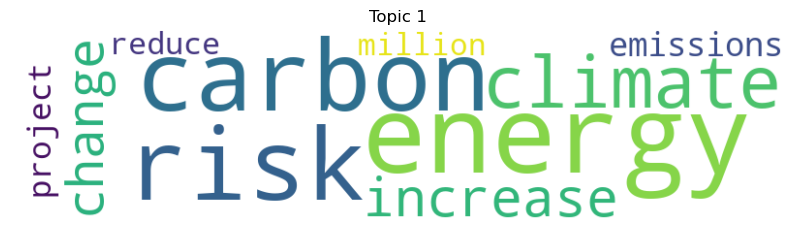

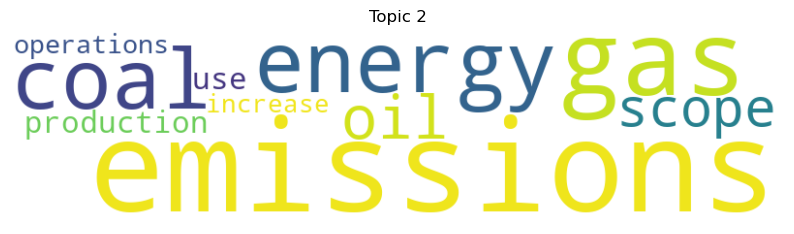

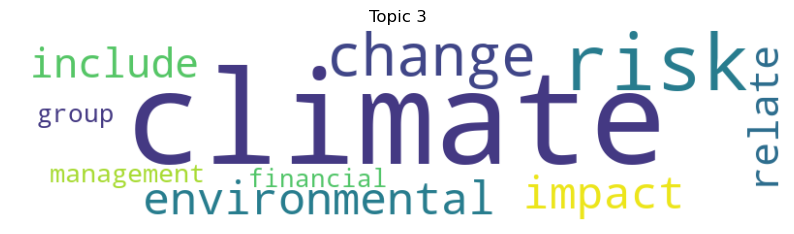

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Function to create a word cloud for each topic
def create_wordcloud_for_topics(lda_model, num_topics, num_words=10):
    for topic_id in range(num_topics):
        # Extract the top `num_words` terms for each topic
        topic_words = lda_model.show_topic(topic_id, num_words)
        
        # Prepare the words and their probabilities for the wordcloud
        word_freq = {word: prob for word, prob in topic_words}
        
        # Create the WordCloud object
        wordcloud = WordCloud(width=800, height=200, background_color="white").generate_from_frequencies(word_freq)
        
        # Plot the word cloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_id + 1}")
        plt.show()

# Assuming `lda_model` is your trained LDA model and you have `num_topics`
num_topics = 3  
create_wordcloud_for_topics(lda, num_topics)


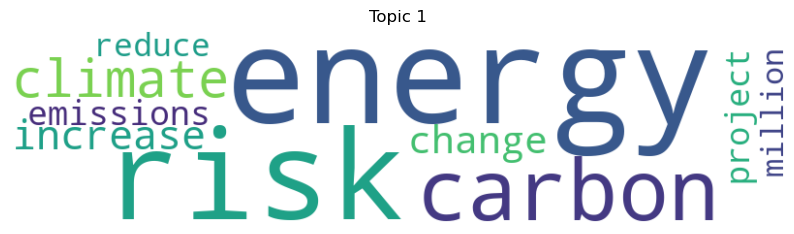

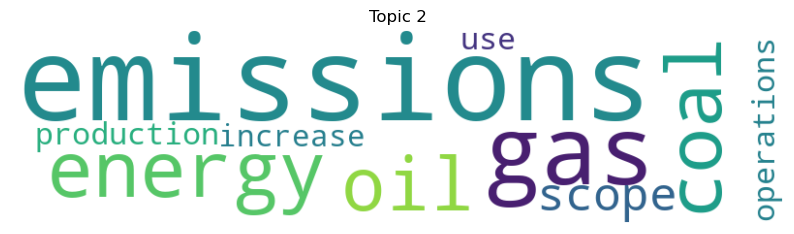

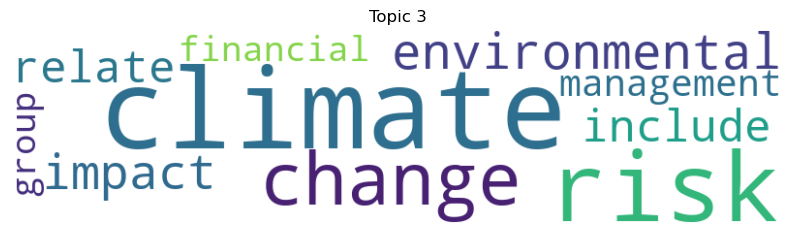

In [86]:
create_wordcloud_for_topics(tfidf_lda_model, num_topics)


# Question 3

## Twitter NER

In [87]:
from datasets import load_dataset
import nltk 

cache_dir = "./data_cache"

# The data is already divided into training and test sets.
# Load the training set:

btc_train_dataset = load_dataset(
    "tner/btc",
    split="train",
    cache_dir=cache_dir,
)
print(f"Training dataset with {len(btc_train_dataset)} instances loaded")

C:\Users\agarw\.cache\huggingface\modules\datasets_modules\datasets\tner--btc\dc97afff728b0e8bd38e9f77bdf79652be9330c01ae7f059fb5a19c720823def\btc.py:10: DeprecationWarning: invalid escape sequence '\%'
  _CITATION = """


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Training dataset with 6338 instances loaded


In [88]:
# Load the test set:
btc_test_dataset = load_dataset(
    "tner/btc",
    split="test",
    cache_dir=cache_dir,
)
print(f"Test dataset with {len(btc_test_dataset)} instances loaded")

Test dataset with 2000 instances loaded


In [89]:
ner_tags =btc_train_dataset.features['tags'].feature.names

id2label = {idx: label for idx, label in enumerate(ner_tags)}
label2id = {label: idx for idx, label in enumerate(ner_tags)}



In [90]:
# Feature extraction function
def word2features(tokens, index):
    """
    Extract features for a given token.
    """
    word = tokens[index][0]
    features = {
        'word': word,
        'is_first': index == 0,
        'is_last': index == len(tokens) - 1,
        'prev_word': '' if index == 0 else tokens[index - 1][0],  # Get the token of previous word
        'next_word': '' if index == len(tokens) - 1 else tokens[index + 1][0],  # Get the token of next word
        'prev_tag': '' if index == 0 else tokens[index - 1][1],  # Get the tag of previous word
        'next_tag': '' if index == len(tokens) - 1 else tokens[index + 1][1],  # Get the tag of next word
        # Add POS tag as a feature
        'pos_tag': nltk.pos_tag([word])[0][1]  # POS tag of the current word
    }
    return features

In [91]:
# Extract features for training data
def extract_features_for_dataset(dataset):
    """
    Convert each sentence in the dataset into a list of features.
    """
    features = []
    for sentence in dataset:
        # sentence is a list of (token, tag) tuples
        sentence_features = [word2features(sentence, i) for i in range(len(sentence))]
        features.append(sentence_features)
    return features
    
# Map tags from numeric to label and reverse during training
def convert_tags_to_labels(dataset):
    """
    Convert a dataset of (token, numeric_tag) tuples into the list of tags.
    """
    return [[tag for _, tag in sentence] for sentence in dataset]


In [92]:
train_set = [list(zip(s['tokens'], [id2label[tok] for tok in s['tags']])) for s in btc_train_dataset][:-1]
test_set = [list(zip(s['tokens'], [id2label[tok] for tok in s['tags']])) for s in btc_test_dataset][:-1]
test_tokens = [s['tokens'] for s in btc_test_dataset][:-1]
test_tags = [[id2label[tok] for tok in s['tags']] for s in btc_test_dataset][:-1]

In [93]:
# Prepare data for CRF model
X_train = extract_features_for_dataset(train_set)
y_train = convert_tags_to_labels(train_set)

X_test = extract_features_for_dataset(test_set)
y_test = convert_tags_to_labels(test_set)

In [94]:
from nltk.tag import CRFTagger
# Basic CRF Tagger
class BasicCRFTagger(CRFTagger):
    def __init__(self):
        super().__init__()
    
    def _get_features(self, tokens, idx):
        """Extract basic features: Current word only."""
        token = tokens[idx]['word']
        feature_list = []
        if not token:
            return feature_list
        feature_list.append("WORD_" + token)
        return feature_list

In [95]:
import re, unicodedata


# Feature extraction for CRF: add POS tags to tokens
def pos_tag_sentence(tokens):
    pos_tags = nltk.pos_tag(tokens)
    return [{'word': w, 'pos_tag': t} for w, t in pos_tags]


def word_shape(word):
    shape = ''
    for c in word:
        if c.isupper():
            shape += 'X'
        elif c.islower():
            shape += 'x'
        elif c.isdigit():
            shape += 'd'
        else:
            shape += c
    return shape

class CustomCRFTagger(CRFTagger):
    _current_tokens = None
    
    def __init__(self, c1=0.2, c2=0.5, max_iter=50):
        # Custom initialization with hyperparameters
        super().__init__()
        self.c1 = c1  # L1 regularization
        self.c2 = c2  # L2 regularization
        self.max_iter = max_iter  # Max number of iterations
        self._pattern = r'\d+'  # Pattern for matching numbers (digits)

    def _get_features(self, tokens, idx):
        """
        Extract basic features about this word including:
            - Current word
            - Is it capitalized?
            - Does it have punctuation?
            - Does it have a number?
            - Suffixes up to length 3
    
        :return: a list which contains the features
        :rtype: list(str)
        """
       # Extract the token (which is a dictionary), and get the word from it
        token = tokens[idx]['word']  # Extract the word from the dictionary
        tag = tokens[idx].get('pos_tag', None)  # Get the POS tag if available (or None)
      
        feature_list = []
    
        if not token:
            return feature_list

        # POS tag
        if tag is not None:
            feature_list.append("POS_" + tag)

        # Word shape
        feature_list.append("SHAPE_" + word_shape(token))
    
        # Capitalization
        if token[0].isupper():
            feature_list.append("CAPITALIZATION")
    
        # Number
        if re.search(self._pattern, token) is not None:
            feature_list.append("HAS_NUM")

        # Twitter-specific
        if token.startswith("@"):
            feature_list.append("MENTION")
        if token.startswith("#"):
            feature_list.append("HASHTAG")
        if token.startswith("http"):
            feature_list.append("URL")
        
        # Punctuation
        punc_cat = {"Pc", "Pd", "Ps", "Pe", "Pi", "Pf", "Po"}
        if all(unicodedata.category(x) in punc_cat for x in token):
            feature_list.append("PUNCTUATION")
    
        
        # Suffix up to length 3
        if len(token) > 1:
            feature_list.append("SUF_" + token[-1:])
        if len(token) > 2:
            feature_list.append("PREF_" + token[:2])
            feature_list.append("SUF_" + token[-2:])
        if len(token) > 3:
            feature_list.append("SUF_" + token[-3:])
            feature_list.append("PREF_" + token[:3])

        # Add character bigrams/trigrams as features
        for i in range(len(token)-1):
            feature_list.append(f"CHAR_BIGRAM_{token[i:i+2]}")
        for i in range(len(token)-2):
            feature_list.append(f"CHAR_TRIGRAM_{token[i:i+3]}")
            
        # Current word
        feature_list.append("WORD_" + token)
        
        if idx > 0:
            feature_list.append("PREVWORD_" + tokens[idx-1]['word'])  # Get the word of the previous token
        if idx < len(tokens)-1:
            feature_list.append("NEXTWORD_" + tokens[idx+1]['word'])  # Get the word of the next token

        if idx > 1:
            feature_list.append("PREV2WORD_" + tokens[idx-2]['word'])
        if idx < len(tokens)-2:
            feature_list.append("NEXT2WORD_" + tokens[idx+2]['word'])
                    
        return feature_list



In [96]:

# Train a CRF NER tagger
def train_CRF_NER_tagger(tagger, X, y, model_filename):
    training_data = []
    for features, labels in zip(X, y):
        # Create a tuple (word, tag) for each word in the sentence
        sentence_data = [(features[i], labels[i]) for i in range(len(features))]
        training_data.append(sentence_data)
        
    tagger.train(training_data, model_filename)
    return tagger


In [97]:

# Train and evaluate both models
basic_tagger = train_CRF_NER_tagger(BasicCRFTagger(), X_train, y_train, 'basic_crf_model.crf')
print("Basic CRF Model Trained")
y_pred_basic = basic_tagger.tag_sents(X_test)


Basic CRF Model Trained


In [98]:
# Train and evaluate both models
custom_tagger = train_CRF_NER_tagger(CustomCRFTagger(), X_train, y_train, 'custom_crf_model.crf')
print("Custom CRF Model Trained")
y_pred_custom = custom_tagger.tag_sents(X_test)

Custom CRF Model Trained


In [99]:
# Utility: Extract only the predicted tags
def extract_predicted_tags(y_pred):
    return [[tag for (_, tag) in sentence] for sentence in y_pred]

y_pred_custom_tags = extract_predicted_tags(y_pred_custom)
y_pred_basic_tags = extract_predicted_tags(y_pred_basic)

In [100]:

# Token-level evaluation
def evaluate_model(y_test, y_pred):
    correct = 0
    total = 0
    for true_seq, pred_seq in zip(y_test, y_pred):
        for true, pred in zip(true_seq, pred_seq):
            total += 1
            if true == pred:
                correct += 1
    accuracy = correct / total if total > 0 else 0
    return accuracy

basic_accuracy = evaluate_model(y_test, y_pred_basic_tags)
print(f"Custom CRF Accuracy: {basic_accuracy:.4f}")

Custom CRF Accuracy: 0.8857


In [101]:
custom_accuracy = evaluate_model(y_test, y_pred_custom_tags)
print(f"Custom CRF Accuracy: {custom_accuracy:.4f}")

Custom CRF Accuracy: 0.9364


In [102]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

# Classification report
y_test_flat = [tag for sent in y_test for tag in sent]
y_pred_flat_basic = [tag for sent in y_pred_basic_tags for tag in sent]
y_pred_flat_custom = [tag for sent in y_pred_custom_tags for tag in sent]


print("Classification Report: Basic CRF")
print(classification_report(y_test_flat, y_pred_flat_basic, target_names= ner_tags))

print("Classification Report:Custom CRF")
print(classification_report(y_test_flat, y_pred_flat_custom, target_names= ner_tags))

Classification Report: Basic CRF
              precision    recall  f1-score   support

       B-LOC       0.82      0.08      0.15       636
       B-ORG       0.69      0.04      0.08      1090
       B-PER       0.83      0.38      0.52      2648
       I-LOC       0.38      0.02      0.05       208
       I-ORG       0.55      0.07      0.12       246
       I-PER       0.09      0.03      0.05       269
           O       0.89      1.00      0.94     30317

    accuracy                           0.89     35414
   macro avg       0.61      0.23      0.27     35414
weighted avg       0.87      0.89      0.85     35414

Classification Report:Custom CRF
              precision    recall  f1-score   support

       B-LOC       0.74      0.44      0.55       636
       B-ORG       0.61      0.35      0.44      1090
       B-PER       0.83      0.79      0.81      2648
       I-LOC       0.61      0.37      0.46       208
       I-ORG       0.48      0.37      0.42       246
       I-PER

F1 Score for B-LOC: 0.5517
F1 Score for B-ORG: 0.4404
F1 Score for B-PER: 0.8109
F1 Score for I-LOC: 0.4578
F1 Score for I-ORG: 0.4174
F1 Score for I-PER: 0.7308
F1 Score for O: 0.9750


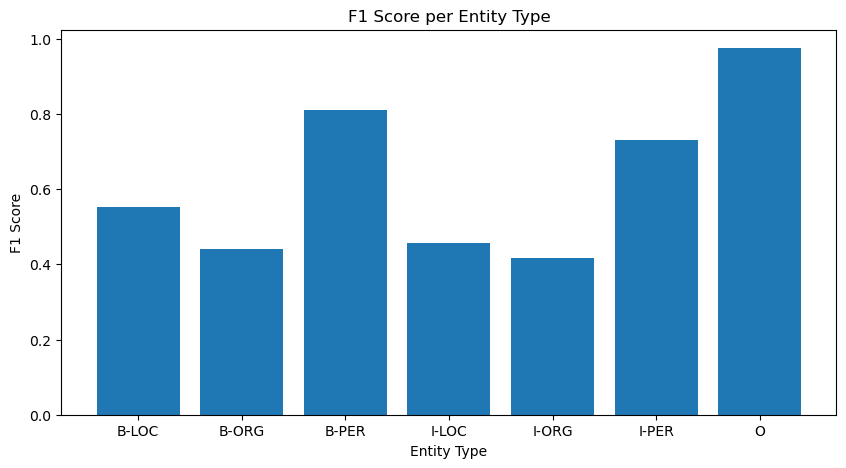

In [116]:
# F1 Score bar plot
def plot_f1_scores(y_test, y_pred, ner_tag_mapping):
    labels = list(ner_tag_mapping.values())
    f1_scores = metrics.f1_score(y_test, y_pred, average=None, labels=labels)

        # Print F1 scores for each entity type
    for label, score in zip(labels, f1_scores):
        print(f"F1 Score for {label}: {score:.4f}")
        
    plt.figure(figsize=(10,5))
    plt.bar(labels, f1_scores)
    plt.ylabel("F1 Score")
    plt.xlabel("Entity Type")
    plt.title("F1 Score per Entity Type")
    plt.show()


plot_f1_scores(y_test_flat, y_pred_flat_custom, id2label)



In [105]:
# Span-level evaluation
def extract_spans(tagged_sents):
    spans = {}
    for sidx, sent in enumerate(tagged_sents):
        start = -1
        entity_type = None
        for i, lab in enumerate(sent):
            if 'B-' in lab:
                start = i
                end = i + 1
                entity_type = lab[2:]
            elif 'I-' in lab and start >= 0:
                end = i + 1
            elif lab == 'O' and start >= 0:
                if entity_type not in spans:
                    spans[entity_type] = []
                spans[entity_type].append((start, end, sidx))
                start = -1
        if start >= 0:
            if entity_type not in spans:
                spans[entity_type] = []
            spans[entity_type].append((start, end, sidx))
    return spans

def cal_span_level_f1(test_sents, pred_sents):
    gold_spans = extract_spans(test_sents)
    pred_spans = extract_spans(pred_sents)
    f1_per_class = []
    ne_types = gold_spans.keys()
    for ne_type in ne_types:
        true_pos = 0
        false_pos = 0
        for span in pred_spans.get(ne_type, []):
            if span in gold_spans[ne_type]:
                true_pos += 1
            else:
                false_pos += 1
        false_neg = 0
        for span in gold_spans[ne_type]:
            if span not in pred_spans.get(ne_type, []):
                false_neg += 1
        precision = true_pos / float(true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
        recall = true_pos / float(true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        f1_per_class.append(f1)
        print(f'F1 score for class {ne_type} = {f1}')
    print(f'Macro-average span-level f1 score = {np.mean(f1_per_class)}')

# For span-level F1, use BIO tag sequences (not tuples)
cal_span_level_f1(y_test, y_pred_custom_tags)

F1 score for class PER = 0.7327553712777987
F1 score for class LOC = 0.5390218522372529
F1 score for class ORG = 0.4092792046396023
Macro-average span-level f1 score = 0.560352142718218


In [112]:
import random
# Show an example entity span
rand_idx = random.randint(0, len(test_set)-1)
sample_sentence = train_set[rand_idx]
tokens = [tok for tok, tag in sample_sentence]
tags = [tag for tok, tag in sample_sentence]
print("\nSample sentence tokens:", tokens)
print("Sample sentence tags:", tags)
spans = extract_spans([tags])
print("Extracted entity spans:", spans)


Sample sentence tokens: ['How', 'did', 'Dorothy', 'Gale', 'come', 'back', '*', 'younger', '*', 'in', 'Return', 'to', 'Oz', '?', '?']
Sample sentence tags: ['O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Extracted entity spans: {'PER': [(2, 4, 0)]}


In [108]:
def extract_misclassified_examples_full(X_test, y_test, y_pred):
    """
    For each sentence, for each token, if misclassified, collect:
    - sentence index
    - token index
    - token word
    - true tag
    - predicted tag
    - the full sentence tokens
    """
    misclassified = []
    for sent_idx, (sent_tokens, true_tags, pred_tags) in enumerate(zip(X_test, y_test, y_pred)):
        tokens = [tok['word'] for tok in sent_tokens]
        for tok_idx, (token, true, pred) in enumerate(zip(tokens, true_tags, pred_tags)):
            if true != pred:
                misclassified.append({
                    'sentence_index': sent_idx,
                    'token_index': tok_idx,
                    'token': token,
                    'true_tag': true,
                    'pred_tag': pred,
                    'sentence': tokens
                })
    return misclassified

misclassified_custom_full = extract_misclassified_examples_full(X_test, y_test, y_pred_custom_tags)

print("\nMisclassified Examples (Custom CRF):")
for text in misclassified_custom_full[:10]:
    print(f"Sentence {text['sentence_index']}: {' '.join(text['sentence'])}")
    print(f"Token: '{text['token']}' (index {text['token_index']})")
    print(f"True tag: {text['true_tag']}, Predicted tag: {text['pred_tag']}")
    print("-" * 60)




Misclassified Examples (Custom CRF):
Sentence 1: This morning I met with Senators Inabo and Senior from Palau to discuss my role as Chair of the Public Works . . . http://t.co/McYNwpzHmt
Token: 'Senators' (index 5)
True tag: O, Predicted tag: B-ORG
------------------------------------------------------------
Sentence 1: This morning I met with Senators Inabo and Senior from Palau to discuss my role as Chair of the Public Works . . . http://t.co/McYNwpzHmt
Token: 'Inabo' (index 6)
True tag: B-PER, Predicted tag: I-ORG
------------------------------------------------------------
Sentence 1: This morning I met with Senators Inabo and Senior from Palau to discuss my role as Chair of the Public Works . . . http://t.co/McYNwpzHmt
Token: 'Senior' (index 8)
True tag: B-PER, Predicted tag: O
------------------------------------------------------------
Sentence 2: Enjoying the Chinese Assoc of Vic annual dinner right here in Aston ! http://t.co/6geIkKyEiS
Token: 'Chinese' (index 2)
True tag: B-

Confusion Matrix for Basic CRF:
[[   53     4    15     0     0     3   561]
 [    1    44   150     0     0    18   877]
 [    1     2  1015     0     1    27  1602]
 [    7     0     1     5     1     0   194]
 [    2     2     0     0    17     0   225]
 [    0     0    12     1     1     8   247]
 [    1    12    33     7    11    30 30223]]


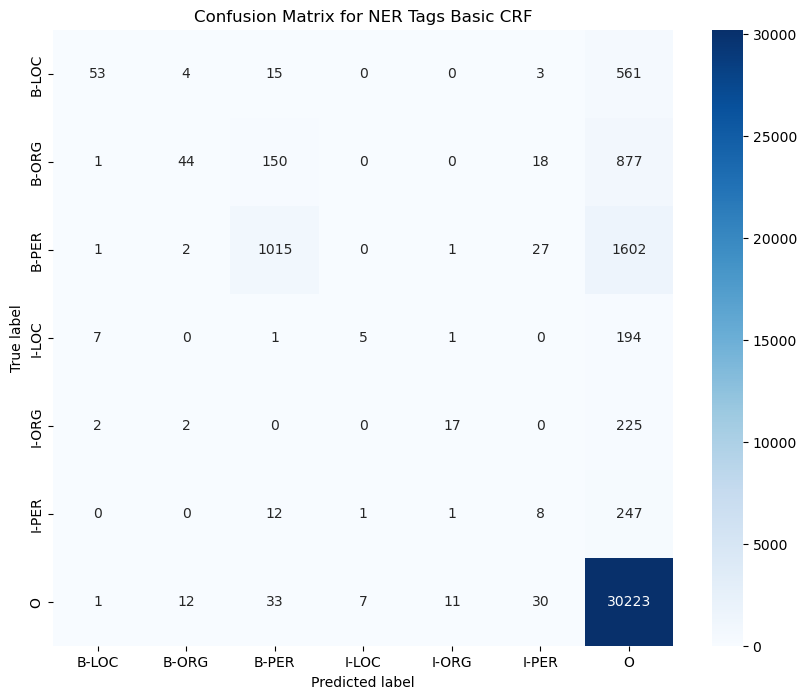

Confusion Matrix for Custom CRF:
[[  280    64    65     2     2     0   223]
 [   30   377   296     5    10     1   371]
 [   22    96  2099     2     2    10   417]
 [    7     4     6    76    20    15    80]
 [    4     6     2    11    91    12   120]
 [    1     0    15     3     1   190    59]
 [   35    75    46    25    64    23 30049]]


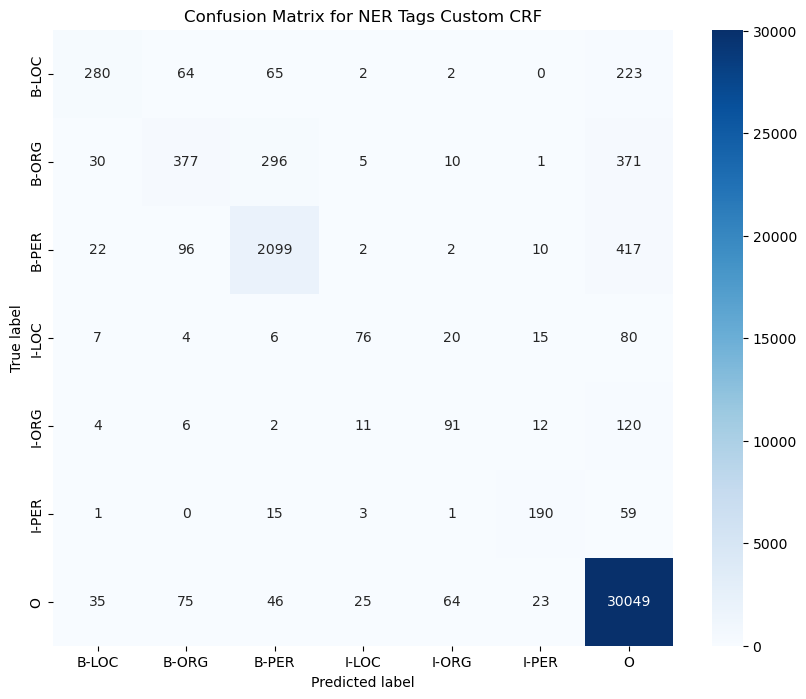

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels,modelname):
    # Flatten the lists of lists into a single list of tags
    y_true_flat = [tag for sent in y_true for tag in sent]
    y_pred_flat = [tag for sent in y_pred for tag in sent]

    # Compute confusion matrix
    cm = confusion_matrix(y_true_flat, y_pred_flat, labels=labels)

      # Print the confusion matrix
    print(f"Confusion Matrix for {modelname}:")
    print(cm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for NER Tags {modelname}')
    plt.show()

# Use your actual y_test and y_pred_custom_tags
plot_confusion_matrix(y_test, y_pred_basic_tags, ner_tags,"Basic CRF")

plot_confusion_matrix(y_test, y_pred_custom_tags, ner_tags,"Custom CRF")

Metrics for Custom CRF:
Entity: B-LOC | Precision: 0.74 | Recall: 0.44 | F1: 0.55
Entity: B-ORG | Precision: 0.61 | Recall: 0.35 | F1: 0.44
Entity: B-PER | Precision: 0.83 | Recall: 0.79 | F1: 0.81
Entity: I-LOC | Precision: 0.61 | Recall: 0.37 | F1: 0.46
Entity: I-ORG | Precision: 0.48 | Recall: 0.37 | F1: 0.42
Entity: I-PER | Precision: 0.76 | Recall: 0.71 | F1: 0.73
Entity: O | Precision: 0.96 | Recall: 0.99 | F1: 0.98


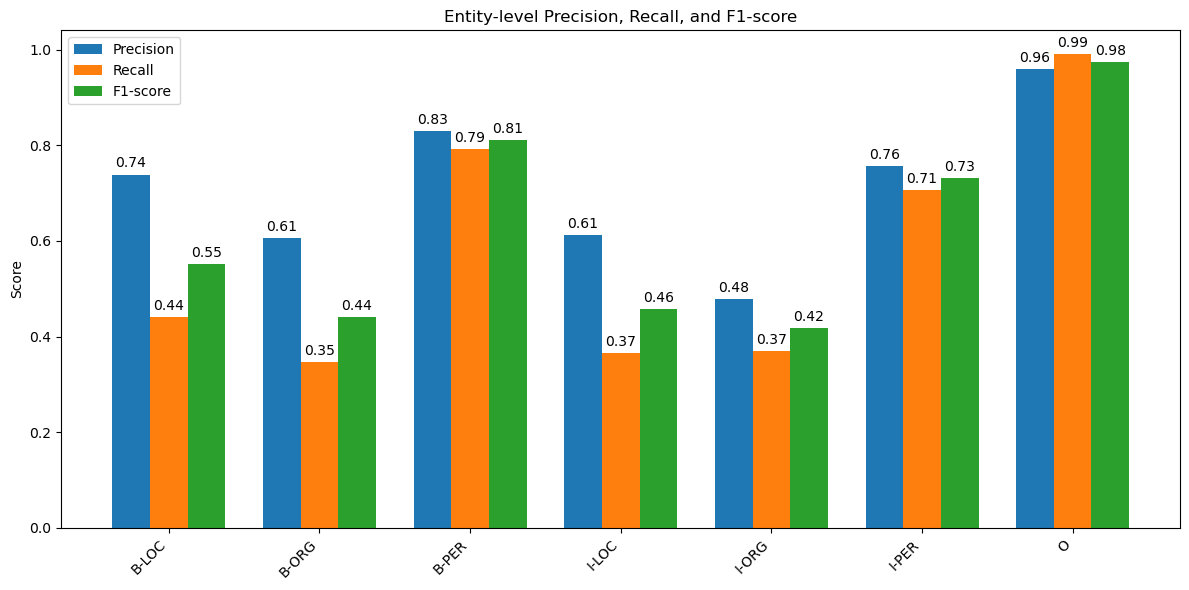

In [118]:
from sklearn.metrics import precision_recall_fscore_support

def plot_entity_metrics(y_true, y_pred, labels,model_name):
    # Compute metrics
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )

    # Print precision, recall, and F1 scores for each label
    print(f"Metrics for {model_name}:")
    for label, p, r, f1_score in zip(labels, precision, recall, f1):
        print(f"Entity: {label} | Precision: {p:.2f} | Recall: {r:.2f} | F1: {f1_score:.2f}")

    x = np.arange(len(labels))  # label locations
    width = 0.25  # width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width, precision, width, label='Precision')
    rects2 = ax.bar(x, recall, width, label='Recall')
    rects3 = ax.bar(x + width, f1, width, label='F1-score')
    plt.title(f"Precision, Recall, and F1 Score for {model_name}")
    
    ax.set_ylabel('Score')
    ax.set_title('Entity-level Precision, Recall, and F1-score')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    # Attach a text label above each bar
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()
    plt.show()

plot_entity_metrics(y_test_flat, y_pred_flat_custom, ner_tags,"Custom CRF")


Example from Test Set 10 (Basic CRF):
Token: Only, True Label: O, Predicted Label: O
Token: 123, True Label: O, Predicted Label: O
Token: days, True Label: O, Predicted Label: O
Token: to, True Label: O, Predicted Label: O
Token: the, True Label: O, Predicted Label: O
Token: bounce, True Label: O, Predicted Label: O
Token: for, True Label: O, Predicted Label: O
Token: the, True Label: O, Predicted Label: O
Token: Cats, True Label: B-ORG, Predicted Label: O
Token: ', True Label: O, Predicted Label: O
Token: first, True Label: O, Predicted Label: O
Token: game, True Label: O, Predicted Label: O
Token: of, True Label: O, Predicted Label: O
Token: the, True Label: O, Predicted Label: O
Token: 2011, True Label: O, Predicted Label: O
Token: season, True Label: O, Predicted Label: O
Token: ., True Label: O, Predicted Label: O
Token: NS, True Label: B-LOC, Predicted Label: O


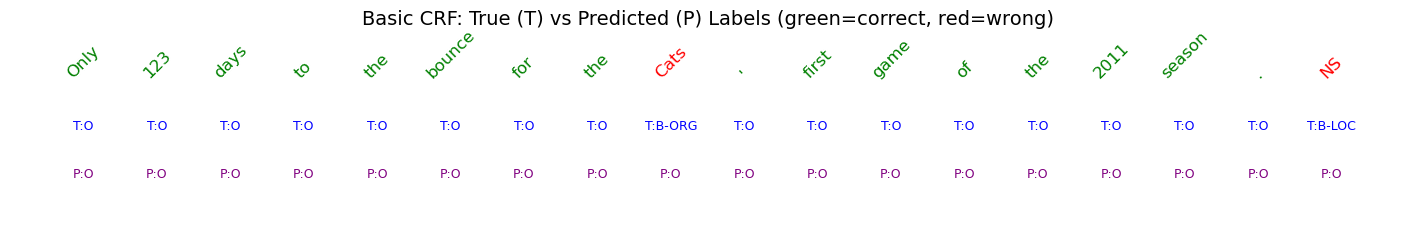


Example from Test Set 10 (Custom CRF):
Token: Only, True Label: O, Predicted Label: O
Token: 123, True Label: O, Predicted Label: O
Token: days, True Label: O, Predicted Label: O
Token: to, True Label: O, Predicted Label: O
Token: the, True Label: O, Predicted Label: O
Token: bounce, True Label: O, Predicted Label: O
Token: for, True Label: O, Predicted Label: O
Token: the, True Label: O, Predicted Label: O
Token: Cats, True Label: B-ORG, Predicted Label: O
Token: ', True Label: O, Predicted Label: O
Token: first, True Label: O, Predicted Label: O
Token: game, True Label: O, Predicted Label: O
Token: of, True Label: O, Predicted Label: O
Token: the, True Label: O, Predicted Label: O
Token: 2011, True Label: O, Predicted Label: O
Token: season, True Label: O, Predicted Label: O
Token: ., True Label: O, Predicted Label: O
Token: NS, True Label: B-LOC, Predicted Label: O


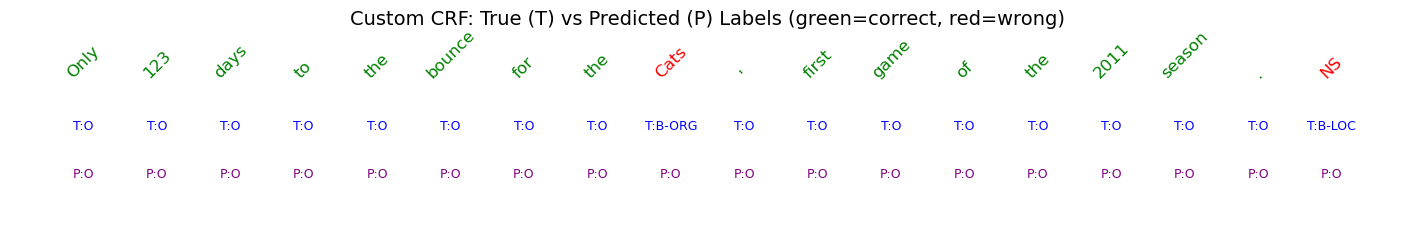

In [111]:
def plot_example_predictions(example_idx, y_test, y_pred, X_test, model_name):
    """
    Plots token-wise true and predicted labels for a given sentence index.
    Correct predictions are green, incorrect are red.
    """
    sentence = X_test[example_idx]
    true_labels = y_test[example_idx]
    # Extract predicted labels from (token, tag) tuples
    predicted_labels = [pred[1] if isinstance(pred, tuple) else pred for pred in y_pred[example_idx]]

    print(f"\nExample from Test Set {example_idx} ({model_name}):")
    for token_dict, true, pred in zip(sentence, true_labels, predicted_labels):
        print(f"Token: {token_dict['word']}, True Label: {true}, Predicted Label: {pred}")

    tokens = [token_dict['word'] for token_dict in sentence]
    colors = ['green' if true == pred else 'red' for true, pred in zip(true_labels, predicted_labels)]

    fig, ax = plt.subplots(figsize=(max(12, len(tokens)), 2.5))
    y_pos = [1] * len(tokens)
    # Scatter tokens with color-coded labels
    for i, (token, color) in enumerate(zip(tokens, colors)):
        ax.text(i, 1, token, fontsize=12, color=color, ha='center', va='bottom', rotation=45)
        ax.text(i, 0.8, f"T:{true_labels[i]}", fontsize=9, color='blue', ha='center')
        ax.text(i, 0.6, f"P:{predicted_labels[i]}", fontsize=9, color='purple', ha='center')

    ax.set_xlim(-1, len(tokens))
    ax.set_ylim(0.4, 1.2)
    ax.axis('off')
    ax.set_title(f"{model_name}: True (T) vs Predicted (P) Labels (green=correct, red=wrong)", fontsize=14)
    plt.show()

# Example usage:
plot_example_predictions(10, y_test, y_pred_basic, X_test, model_name="Basic CRF")
plot_example_predictions(10, y_test, y_pred_custom, X_test, model_name="Custom CRF")

